In [43]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Default installation PATH for TeXLive.
os.environ["PATH"] += os.pathsep + "/usr/local/texlive/2024/bin/x86_64-linux/"

plt.close('all')
mpl.use("pgf")
preamble = "\n".join([
    r"\usepackage{amsmath}",
    r"\usepackage{amsfonts}",
    r"\usepackage{amssymb}"
])
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'pgf.rcfonts': False,
    'pgf.preamble': preamble,
    'font.family': 'serif',
    'text.usetex': True,
    'text.latex.preamble': preamble,
    'figure.dpi': 180
})

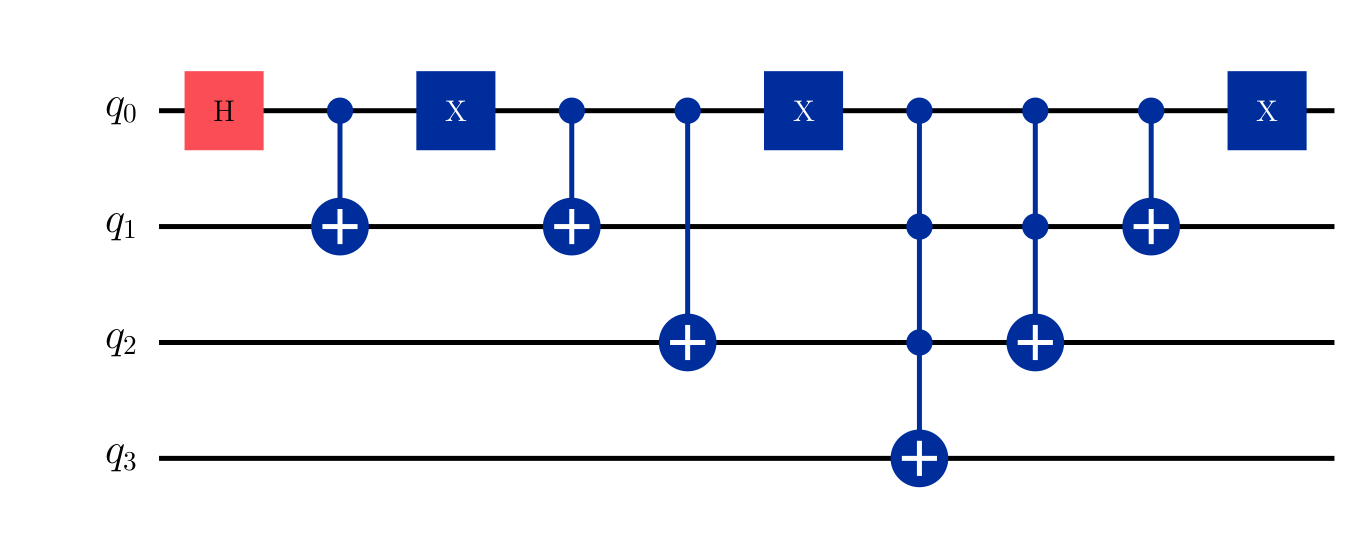

In [44]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.x(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.x(0)

qc.mcx([0, 1, 2], 3)
qc.mcx([0, 1], 2)
qc.cx(0, 1)
qc.x(0)

qc.draw(output='mpl')

In [45]:
qc.measure_all()

from qiskit import generate_preset_pass_manager
from qiskit_aer import AerSimulator

simulator = AerSimulator()
# Allow circuit to run on our backend.

circuit = generate_preset_pass_manager(backend=simulator, optimization_level=3).run(qc)

print(qc.count_ops())

job = simulator.run(qc, shots=1000)

counts = dict(job.result().get_counts())

OrderedDict({'cx': 4, 'measure': 4, 'x': 3, 'h': 1, 'mcx': 1, 'ccx': 1, 'barrier': 1})


In [46]:
import numpy as np

filtered_distribution = {key.replace(" ", ""): value for key, value in counts.items()}
filtered_distribution = dict(sorted(filtered_distribution.items(), key=lambda x: x[0]))

x,y = zip(*filtered_distribution.items())
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
xlocs = np.arange(len(x))

ax.bar(xlocs, y, width=0.5, align='center')
ax.bar_label(ax.containers[0])

ax.set_xticks(xlocs)
ax.set_xticklabels(x)
ax.set_xlim(-0.4, xlocs.max() + 0.4)

plt.ylabel('Count (\\# measured)', fontsize=12)
plt.xlabel('Bit String', fontsize=12)
plt.xticks(rotation=90)
plt.title("Histogram of 1000 measurements of an incrementer applied to $\\frac{1}{\\sqrt{2}}(|3\\rangle + |6\\rangle$).", fontsize=12)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# plt.show()
plt.tight_layout()
plt.savefig("incrementer_counts.pgf")